# Exploratory Data Analysis

#### Amazon Book Reviews DataFrame

I previously downloaded a dataset of 8.9 million book reviews courtesy of Julian McAuley, UCSC. For the purposes of this notebook, we will examine only 15,000 rows.

My ultimate goal is to write a machine-learning program to determine how helpful a given review is. The first step in this process is analyzing the dataset.

http://jmcauley.ucsd.edu/data/amazon/

## Examine Data

In [561]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Open DataFrame with 15,000 rows
df = pd.read_csv('Amazon_Data_Frame.csv', nrows=15000)

# View DataFrame
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000
1,1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800
2,2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200
3,3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600
4,4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800


The helpful column is of particular interest, presumably split into helpful votes and total votes. The review text is also essential.

In [562]:
# Delete extraneous column
del df['Unnamed: 0']

In [563]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
asin              15000 non-null object
helpful           15000 non-null object
overall           15000 non-null float64
reviewText        14998 non-null object
reviewTime        15000 non-null object
reviewerID        15000 non-null object
reviewerName      14998 non-null object
summary           14999 non-null object
unixReviewTime    15000 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


I must examine the null objects and delete them if necessary.

In [564]:
# Check null object in reviewText
df[df['reviewText'].isnull()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
11860,0007107927,"[0, 0]",5.0,NaN,"11 10, 2011",ANPZ2PNZB90CX,"David E. McClendon ""Business Consultant""",A timeless classic,1320883200
14255,000712774X,"[0, 0]",5.0,NaN,"09 6, 2013",A25E82UQTFB5EO,"Book Reviewers Club ""A Book Review Club made ...",Fantastic Collection of Short Stories,1378425600


These rows will be deleted since I will the reviewText column contains essential information.

In [565]:
# Check null object in reviewerName
df[df['reviewerName'].isnull()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
6861,0002727463,"[0, 0]",5.0,Fast 5 read. British history of the border lim...,"07 12, 2014",AVXZ5AF18WDHG,NaN,British Border History revealed readably,1405123200
14384,0007133103,"[0, 0]",5.0,This book changed my life 3 years ago. It was ...,"07 14, 2014",A3LXCRJOPYGVWT,NaN,Essential book for anyone suffering with Endom...,1405296000


Although the reviewer has not provided a reviewerName, they have a reveiwerID. These are okay to leave.

In [566]:
# Check null object in summary
df[df['summary'].isnull()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
12394,0007118899,"[2, 5]",4.0,"This is the love story of Tatiana, young Russi...","08 14, 2006",A2YNAI5C0TJMEN,"Erin Brooks ""Erin Brooks""",NaN,1155513600


I will not be analyzing summaries, so this row is okay.

#### Delete Rows

In [567]:
# Delete rows with NaN for reviewText
df = df.dropna(axis=0, subset=['reviewText'])

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 9 columns):
asin              14998 non-null object
helpful           14998 non-null object
overall           14998 non-null float64
reviewText        14998 non-null object
reviewTime        14998 non-null object
reviewerID        14998 non-null object
reviewerName      14996 non-null object
summary           14997 non-null object
unixReviewTime    14998 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


## Create New Columns

The following columns have been created with the purpose of finding compelling numbers to determine a reviewer's Helpful_Score.

### Split Helpful Column

In [569]:
import numpy as np
import ast
# Convert 'helpful' column into list
myList = np.array(df.helpful.apply(lambda row: ast.literal_eval(row)).tolist())

# Separate list into distinct columns
df['Helpful_Votes'] = myList[:,0]
df['Total_Votes'] = myList[:,1]

### Add Helpful Percentage

In [570]:
# Create column for percentage of helpful votes, convert NaN values to 0.
df['Helpful_Percentage'] = (df['Helpful_Votes']/df['Total_Votes']).fillna(0)
# Check for error points any error points
df.loc[df['Helpful_Percentage']>1.0]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage
1533,0002007770,"[2, 1]",3.0,I was surprised to find that Water for Elephan...,"03 5, 2009",A1FJC36TGXG20D,"Jessica Bender ""aglowgal""","Exciting, boring, then exciting again.",1236211200,2,1,2.0


#### Remove Error Point

In [571]:
df.drop(df.index[1533], inplace=True)

### Text Functions

In order to add new columns analyzing the average sentence length, and word length per review, I have written the following functions.

In [572]:
# import regular expressions
import re

def average_sentence_length(text):
    # choose endings to split sentences with re
    sentence_endings = r"[.?!]"
    # use spaces to separate words with re
    spaces = r"\s+"
    
    # split sentences
    sentences = re.split(sentence_endings, text)
    # filter out blanks (occurs after last punctuation mark)
    sentences = list(filter(None, sentences))
    
    count = 0.0
    for sentence in sentences:
        # split sentence into individual words
        words = re.split(spaces, sentence)
        # filter out empty words
        words = list(filter(None, words))
        # add word count
        count += len(words)
    return count/len(sentences)


def average_word_length(text):
    
    # prepare punctuation strip with re
    strip = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from text
    words = strip.sub('', text)

    # use spaces to separate words with re
    spaces = r"\s+"
    
    # split sentences into list of words
    words = re.split(spaces, words)
    
    count = 0
    for word in words:
        # count length of each word
        count += len(word)
    return count/len(words)

### Add Columns

This is a master list of additional columns that may be of use later.

In [573]:
# Create column for unhelpful votes
df['Unhelpful_Votes'] = df['Total_Votes']-df['Helpful_Votes']

# Create column for helpful votes above expected helpful votes
helpfulPercentage = 0.7426197720523914
# helpfulPercentage is mean percentage of Helpful_Votes (previously computed) over entire 8.9 million row dataset
df['Helpful_Above_Mean'] = df['Helpful_Votes']-df['Total_Votes']*helpfulPercentage

# Create column for length of review
df['Review_Length'] = df['reviewText'].str.len()

# Create column for average length of sentence
df['Sentence_Length'] = df['reviewText'].apply(average_sentence_length)

# Create column for average word length
df['Word_Length'] = df['reviewText'].apply(average_word_length)

# Create column that sums helpful votes per user
df['Helpful_Votes_User'] = df.groupby('reviewerID')['Helpful_Votes'].transform('sum')

# Create column that sums total votes per user
df['Total_Votes_User'] = df.groupby('reviewerID')['Total_Votes'].transform('sum')

# Create column for user's percentage of helpful votes
df['User_Helpful_Percentage']=(df['Helpful_Votes_User']/df['Total_Votes_User']).fillna(0)
# fillna(0) will convert NaN to 0 when totalVotes_User == 0

# Create column that sums unhelpful votes
df['Unhelpful_Votes_User'] = df.groupby('reviewerID')['Unhelpful_Votes'].transform('sum')

# Create column for user's helpful votes above expected helpful votes
df['Helpful_Above_Mean_User'] = df['Helpful_Votes_User']-df['Total_Votes_User']*helpfulPercentage

# Create column that sums total reviews per book 
df['Total_Reviews_Book'] = df.groupby('asin')['asin'].transform('count')

# Create column that sums helpful votes per book
df['Helpful_Votes_Book'] = df.groupby('asin')['Helpful_Votes'].transform('sum')

# Create column that sums total votes per book
df['Total_Votes_Book'] = df.groupby('asin')['Total_Votes'].transform('sum')

### Helpful Score

There is no single column in the data to measure how helpful a particular review is. Helpful_ Votes and Helpful_Percentage are the two leading candidates.

First, I have created a new function to scale Helpful_Votes to range (0,1). I have settled on a piecewise linear function to create an even spread of scores.

In [574]:
# determine slope, y_intercept from two given points
def two_points_line(a,b):
    slope = (b[1] - a[1])/(b[0]-a[0])
    y_int = a[1] - slope * a[0]
    return slope, y_int

In [575]:
# given input of helpful_votes, convert output to score between 0 and 1
def helpful_votes_rating(x):
    m1, b1 = two_points_line((0,0), (5,0.4))
    if x < 6: 
        y = m1 * x + b1
    elif x < 16:
        m2, b2 = two_points_line((5,0.4), (15,0.75))
        y = m2 * x + b2
    elif x < 26: 
        m3, b3 = two_points_line((15,0.75), (25,0.9))
        y = m3 * x + b3
    elif x < 51: 
        m4, b4 = two_points_line((25, 0.9), (50, 0.95))
        y = m4 * x + b4
    elif x < 101: 
        m5, b5 = two_points_line((50, 0.95), (100, 0.99))
        y = m5 * x + b5
    elif x < 251: 
        m6, b6 = two_points_line((100, 0.99), (250, 0.999))
        y = m6 * x + b6
    elif x < 1000: 
        m6, b6 = two_points_line((250, 0.999), (999, 0.999999))
        y = m6 * x + b6
    else: 
        y = 1.0
    return y

In [576]:
# create new column converting Helpful_Votes to a rating
df['Helpful_Votes_Rating'] = df['Helpful_Votes'].apply(helpful_votes_rating)

I added one more piece to the helpful score. In order to balance out popular books receiving more helpful votes, I added the percentage of helpful votes per book that the reviewer has received. Since this percentage is very small, and right skewed it must be scaled accordingly.

In [577]:
df['Helpful_Percentage_Book'] = df['Helpful_Votes']/df['Helpful_Votes_Book']
df['Helpful_Percentage_Book_Score'] = np.log(df['Helpful_Percentage_Book']+1.71828)
df['Helpful_Percentage_Book_Score'].describe()

count    14987.000000
mean         0.551099
std          0.037648
min          0.541324
25%          0.541324
50%          0.541396
75%          0.543027
max          0.999999
Name: Helpful_Percentage_Book_Score, dtype: float64

I came up with 1.71828 by trial and error, using e-1 as a guide. Since most percentages are the same, this log distribution ensures that reviewers are not penalized if they do not have a large percentage of the total helpful reviews, while reviewers are rewarded whose percentage of helpful reviews are helpful.

In [578]:
# Create weighted helpful score
df['Helpful_Score'] = (0.48*df['Helpful_Votes_Rating'] + 0.48*df['Helpful_Percentage']) + 0.04*df['Helpful_Percentage_Book_Score']

In [579]:
# Display dataframe with top helpful scores.
df.sort_values(by = ['Helpful_Score'], ascending=False)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage,Unhelpful_Votes,Helpful_Above_Mean,Review_Length,Sentence_Length,Word_Length,Helpful_Votes_User,Total_Votes_User,User_Helpful_Percentage,Unhelpful_Votes_User,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book,Helpful_Votes_Rating,Helpful_Percentage_Book,Helpful_Percentage_Book_Score,Helpful_Score
14429,000713326X,"[81, 81]",5.0,Although the title of the book refers to water...,"11 22, 2006",A1GCF1CLZMAH40,S. J. Bockett,New inspiration,1164153600,81,81,1.000000,0,20.847798,1485,20.166667,5.102128,81,81,1.000000,0,20.847798,12,92,92,0.974800,0.880435,0.955017,0.986105
7730,0006388515,"[109, 109]",5.0,Larry Collins and Dominique Lapierre have mana...,"03 11, 2001",A2E71VWXO59342,Jasleen Matharu,At the stroke of midnight ... when the world s...,984268800,109,109,1.000000,0,28.054445,2966,18.555556,4.844130,117,119,0.983193,2,28.628247,37,265,296,0.990540,0.411321,0.755935,0.985697
7600,0006280862,"[146, 148]",5.0,"This is my second taste of Nouwen, and it has ...","04 3, 2001",A1S0B0384D3LE7,Just-a-girl,A lifeline for the weary Christian - refreshin...,986256000,146,148,0.986486,2,36.092274,1813,15.904762,4.268882,146,148,0.986486,2,36.092274,16,203,213,0.992760,0.719212,0.890970,0.985677
14925,0007146841,"[115, 117]",3.0,This is a good book. It covers mind mapping br...,"10 31, 2005",A1BJUMKKRLK9XX,Jagadeesh K. Venugopal,Good book despite hype,1130716800,115,117,0.982906,2,28.113487,1275,15.428571,4.909524,312,333,0.936937,21,64.707616,8,150,169,0.990900,0.766667,0.910251,0.983837
14888,0007145160,"[176, 180]",5.0,There was yoga before the time of Patanjali bu...,"10 19, 2003",ABN5K7K1TM1QA,Dennis Littrell,The theory behind the practice,1066521600,176,180,0.977778,4,42.328441,5965,20.265306,4.915897,176,180,0.977778,4,42.328441,14,252,288,0.994560,0.698413,0.882400,0.982018
4070,0002242052,"[299, 304]",5.0,Tom Clancy has created several fictional heroe...,"09 26, 2003",A1A87TUBBDPMF0,"Alex Diaz-Granados ""fardreaming writer""",Revenge without remorse....,1064534400,299,304,0.983553,5,73.243589,2012,24.428571,4.810089,310,319,0.971787,9,73.104293,262,851,1219,0.999065,0.351351,0.727371,0.980751
12355,0007118481,"[93, 94]",5.0,"This account of how a young Scot, captured by ...","09 2, 2003",A2DU42COPW49GF,Philip A. True,Inspiring Account of Perservence over Adversity,1062460800,93,94,0.989362,1,23.193741,2453,27.466667,4.797066,93,94,0.989362,1,23.193741,22,192,200,0.984400,0.484375,0.789663,0.978992
14907,0007145411,"[70, 70]",5.0,"David Hoffman's ""The Complete Illustrated Holi...","04 25, 2007",A1SW80RQNB3DMK,EquesNiger,The best home herbal I've found so far,1177459200,70,70,1.000000,0,18.016616,1778,28.300000,5.163121,75,77,0.974026,2,17.818278,9,111,122,0.966000,0.630631,0.853952,0.977838
11586,0006917801,"[69, 69]",5.0,All of the Three Investigators books are much ...,"08 2, 2001",A3KF4IP2MUS8QQ,"Daniel Jolley ""darkgenius""",Hello to Old Friends,996710400,69,69,1.000000,0,17.759236,2345,20.380952,4.306792,71,71,1.000000,0,18.273996,25,114,147,0.965200,0.605263,0.843093,0.977020
6883,0002727463,"[73, 73]",5.0,Until England and Scotland were united under a...,"06 9, 2005",ATV9X3FTXRIM4,Mike Christie,"Thorough, well-structured, and entertaining",1118275200,73,73,1.000000,0,18.788757,2165,25.928571,4.898592,73,73,1.000000,0,18.788757,27,208,246,0.968400,0.350962,0.727182,0.973919


### Create DataFrame Where Total_Votes>0

In [580]:
# Reduced DataFrame only includes reviews with votes
df_sub = df[df['Total_Votes']!=0]

## Show Data

In [581]:
df_sub.describe()

,overall,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage,Unhelpful_Votes,Helpful_Above_Mean,Review_Length,Sentence_Length,Word_Length,Helpful_Votes_User,Total_Votes_User,User_Helpful_Percentage,Unhelpful_Votes_User,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book,Helpful_Votes_Rating,Helpful_Percentage_Book,Helpful_Percentage_Book_Score,Helpful_Score
count,10114.000000,1.011400e+04,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000
mean,4.069804,1.216714e+09,6.055171,8.752225,0.647438,2.697054,-0.444404,1008.675203,16.574234,4.436520,10.323809,13.996144,0.648307,3.672335,-0.070005,1115.102235,5084.213170,7908.023136,0.238298,0.026992,0.555809,0.447386
std,1.236205,1.382944e+08,31.408958,35.041405,0.375791,6.796994,7.316033,1135.271245,6.298512,0.404236,46.045063,51.316703,0.362884,8.599429,9.862231,1093.799787,5610.077232,9557.413473,0.251728,0.089069,0.045079,0.250869
min,1.000000,8.714304e+08,0.000000,1.000000,0.000000,0.000000,-130.523954,8.000000,1.000000,2.900000,0.000000,1.000000,0.000000,0.000000,-130.523954,5.000000,1.000000,1.000000,0.000000,0.000000,0.541324,0.021653
25%,3.000000,1.105855e+09,1.000000,1.000000,0.333333,0.000000,-0.911437,282.000000,12.181818,4.178506,1.000000,1.000000,0.384615,0.000000,-0.970479,77.000000,263.000000,328.000000,0.080000,0.000124,0.541396,0.300054
50%,5.000000,1.233965e+09,2.000000,3.000000,0.770330,1.000000,0.257380,640.500000,15.954545,4.435897,2.000000,4.000000,0.753482,1.000000,0.257380,610.000000,2144.000000,2899.000000,0.160000,0.000888,0.541841,0.540056
75%,5.000000,1.344470e+09,5.000000,8.000000,1.000000,2.000000,0.514760,1317.000000,20.186080,4.689655,7.000000,11.000000,1.000000,3.000000,0.514760,2054.000000,8096.000000,10339.000000,0.400000,0.009434,0.546799,0.590477
max,5.000000,1.404950e+09,1515.000000,1581.000000,1.000000,210.000000,340.918140,17612.000000,77.000000,7.666667,1515.000000,1581.000000,1.000000,211.000000,340.918140,2720.000000,15208.000000,26552.000000,1.000000,1.000000,0.999999,0.986105


## Display Histograms

### All Rows

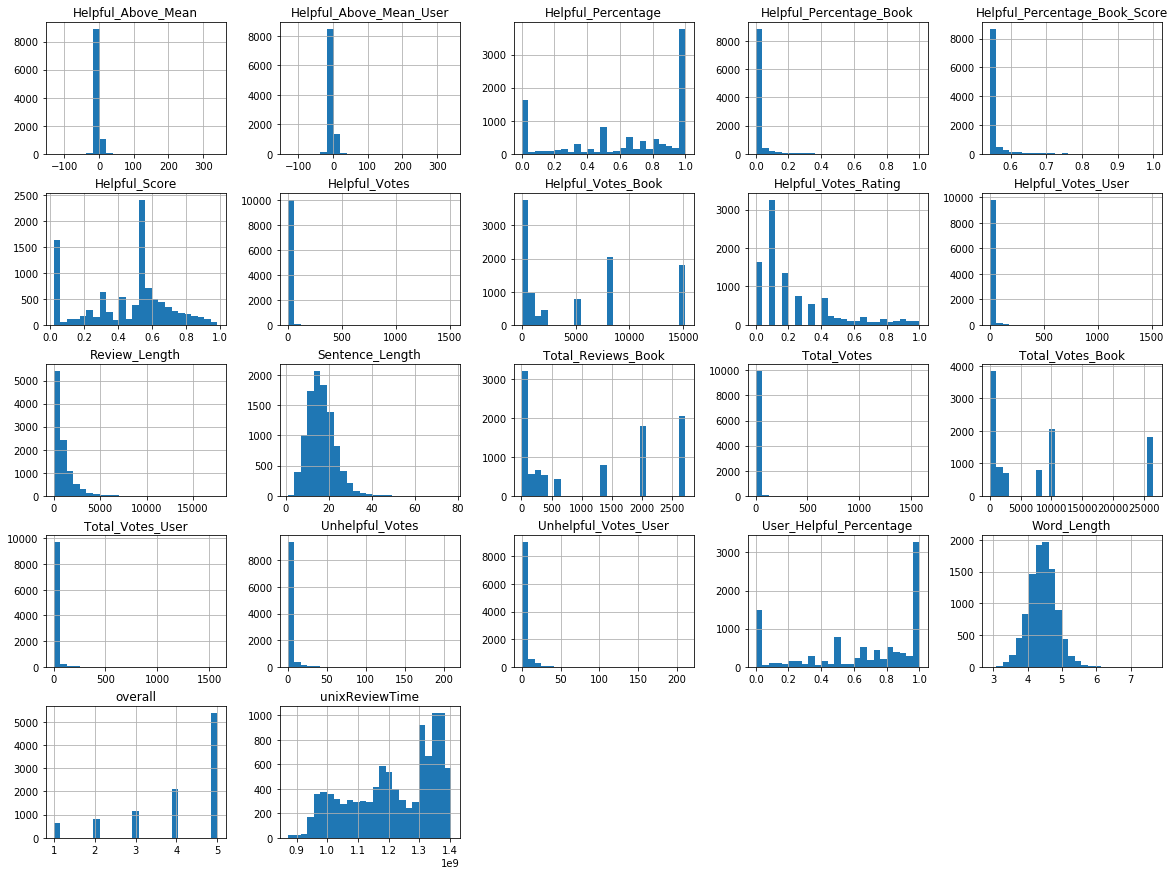

In [582]:
# Show plots inline
%matplotlib inline

#Import matplotlib
import matplotlib.pyplot as plt

# Create histograms for all numberical columns, set number of bins and size
df_sub.hist(bins=25, figsize=(20,15))

# Show plot
plt.show()

Many plots are biased toward 0. The 'overall' histogram reveals a strongly left skewed graph. Same with 'unixReviewTime'. 'Review_Length is a nice that is strongly right skewed. 'Helpful_Percentage' is very U-shaped. Word_Length is close to normally distributed.

## Functions for EDA

In [583]:
# Scatter function takes inputs of x-column, y-column, dataframe and alpha
def scatter(x_col, y_col, title, df, alpha):
    # Set x as the df x-column paramter
    x = df[x_col]
    # Set y as the df x-column paramter
    y = df[y_col]
    # Label x as x-column string parameter
    plt.xlabel(str(x_col))
    # Label y as y-column string parameter
    plt.ylabel(str(y_col))
    # Label title as title
    plt.title(title)
    # Create scatter plot with provided alpha
    plt.scatter(x,y,alpha=alpha)

In [584]:
# Correlation function takes inputs of two arrays
def correlation(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

## Helpful Votes / Total Votes

### Scatter Plot

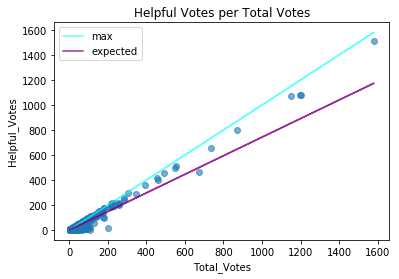

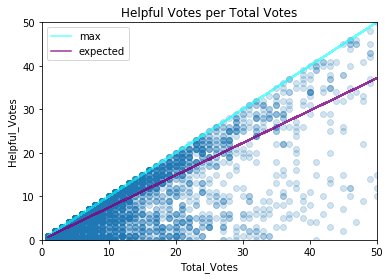

     Correlation Coefficient: 0.9850063437820218 .


In [591]:
# MAIN PLOT

# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Total_Votes', 'Helpful_Votes', 'Helpful Votes per Total Votes', df_sub, alpha=0.6)

# Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max', alpha=0.6)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Show plot
plt.show()


# ZOOM PLOT

# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Total_Votes', 'Helpful_Votes', 'Helpful Votes per Total Votes', df_sub, alpha=0.2)

# Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max', alpha=0.6)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Set limits for x and y
plt.xlim(0,50)
plt.ylim(0,50)

# Show the plot
plt.show()


# CORRELATION

# Choose correlation arrays
x = df_sub['Total_Votes']
y = df_sub['Helpful_Votes']

# Compute correlation of x,y
coeff = correlation(x,y)

# Print result
print('     Correlation Coefficient:', coeff, '.')

The graphs show a linear relationship with strong clustering near the origin. The correlation between Total_Votes and Helpful_Votes is surprisingly high. This indicates that more points near the origin are closer to the max than the min. We can conclude that users are more likely to vote if they consider a review helpful. But is the correlation really that high?

### Violin Plot

A Violin Plot can confirm the distribution of points near the origin compared to other groupings.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


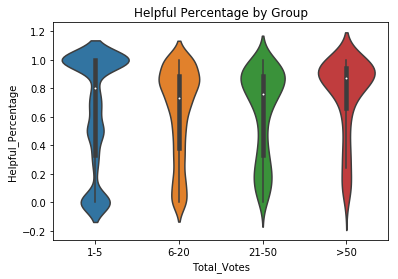

In [163]:
# Create new column for Violin Plot
df_sub['label']='None'

# Label the column depending on number of Total_Votes.
df_sub.loc[df_sub['Total_Votes'] <= 5, 'label'] = "1-5"
df_sub.loc[(df_sub['Total_Votes'] > 5) & (df_sub['Total_Votes'] <= 20), 'label'] = "6-20"
df_sub.loc[(df_sub['Total_Votes'] > 20) & (df_sub['Total_Votes'] <= 50), 'label'] = "21-50"
df_sub.loc[df_sub['Total_Votes'] > 50, 'label'] = ">50"

# Import seaborn
import seaborn as sns
# Create Violin Plot using the new column and Helpful_Percentage
_ = sns.violinplot(x='label', y='Helpful_Percentage', data=df_sub, order=['1-5', '6-20', '21-50', '>50'])
# Label x-coordinate and title.
_ = plt.xlabel('Total_Votes')
_ = plt.title('Helpful Percentage by Group')

Reviews with 1-5 votes have the widest range. In general, the violins are thick on the top and thin on the bottom, indicating greater clustering toward the max.

## Unhelpful Votes / Helpful Votes

What about the correlation between helpful and unhelpful votes. Should it match the correlation between helpful votes and total votes?

### Scatter Plot

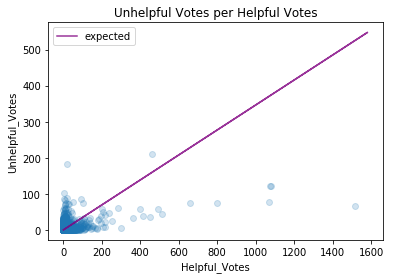

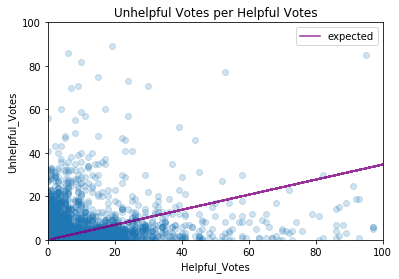

     Correlation Coefficient: 0.45712093817382793 .


In [592]:
# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Helpful_Votes', 'Unhelpful_Votes', 'Unhelpful Votes per Helpful Votes', df_sub, 0.2)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, x/helpfulPercentage-x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[expectedLine])

# Show plot
plt.show()

# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Helpful_Votes', 'Unhelpful_Votes', 'Unhelpful Votes per Helpful Votes', df_sub, alpha=0.2)

# The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, x/helpfulPercentage-x, 'purple', label='expected', alpha=0.8)

# Create legend
plt.legend(handles=[expectedLine])

# Set x,y bounds
plt.xlim(0,100)
plt.ylim(0,100)

# Show plot
plt.show()

# CORRELATION

# Choose correlation arrays
x = df_sub['Helpful_Votes']
y = df_sub['Unhelpful_Votes']

# Compute correlation of x,y
coeff = correlation(x,y)

# Print result
print('     Correlation Coefficient:', coeff, '.')

Ther correlation between helpful votes and total votes (0.9850059728807815) is much higher than the correlation between helpful votes and unhelpful votes (0.45712093817382793). The issue lies in the range. Since helpful votes cannot exceed total votes, half of the graph is eliminated. Furthermore, a random clustering in the available half would give a strong positive correlation since the half is split by the line y = x. In other words, the correlation between helpful votes and total votes (0.9850059728807815) is misleading. 

## Helpful_Score

My goal is to predict the helpful score right after a review has been written. So I need to look at the columns that influence Helpful_Score. When doing so, it's important to ignore columns like Helpful_Percentage that were utilized to create helpful score.

### Correlation Matrix

In [588]:
corr_matrix = df_sub.corr()
corr_matrix['Helpful_Score'].sort_values(ascending=False)

Helpful_Score                    1.000000
Helpful_Percentage               0.891573
User_Helpful_Percentage          0.853271
Helpful_Votes_Rating             0.740178
Helpful_Percentage_Book_Score    0.339687
Helpful_Percentage_Book          0.325971
Helpful_Above_Mean               0.322976
Helpful_Above_Mean_User          0.285036
Review_Length                    0.280760
Helpful_Votes                    0.245591
Helpful_Votes_User               0.223162
Total_Votes                      0.205625
Sentence_Length                  0.205134
Word_Length                      0.201658
Total_Votes_User                 0.195871
Unhelpful_Votes_User            -0.026054
Unhelpful_Votes                 -0.074795
overall                         -0.079768
Total_Reviews_Book              -0.143656
Helpful_Votes_Book              -0.210424
Total_Votes_Book                -0.218068
unixReviewTime                  -0.256329
Name: Helpful_Score, dtype: float64

Review_Length, Sentence_Length, Word_Length and overall should all be examined further as they had nothing to do with the creation of the Helpful_Score column. Since the correlations are all under 0.30, I want to check if the correlations above could be produced by chance alone.

### Statistical Significance

In [597]:
# Pick columns to check
x = df_sub['Helpful_Score']
y1 = df_sub['Review_Length']
y2 = df_sub['Sentence_Length']
y3 = df_sub['Word_Length']
y4 = df_sub['overall']

# Import scipy and stats
import scipy
from scipy import stats

# Scipy's Paerson function returns the correlation and the p-value
print(scipy.stats.pearsonr(x, y1))
print(scipy.stats.pearsonr(x, y2))
print(scipy.stats.pearsonr(x, y3))
print(scipy.stats.pearsonr(x, y4))

(0.2807595504245973, 1.4532681203202065e-182)
(0.2051339957642283, 1.5390153384100495e-96)
(0.20165779947975726, 2.7144686110738298e-93)
(-0.07976826389839484, 9.436225180615775e-16)


Let us consider the last example. The standard interpretation is as follows. The null hypothesis is that there is no correlation. If so, there is a 9.436225180615775e-16 probability that the correlation of -0.07976826389839484 is due to chance alone. Therefore we reject the null hypothesis and accept the alternative hypothesis, namely that the correlation is valid.

The correlations are significant since the number of points analyzed are over 10,000. 

### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33960ba8>,
      dtype=object)

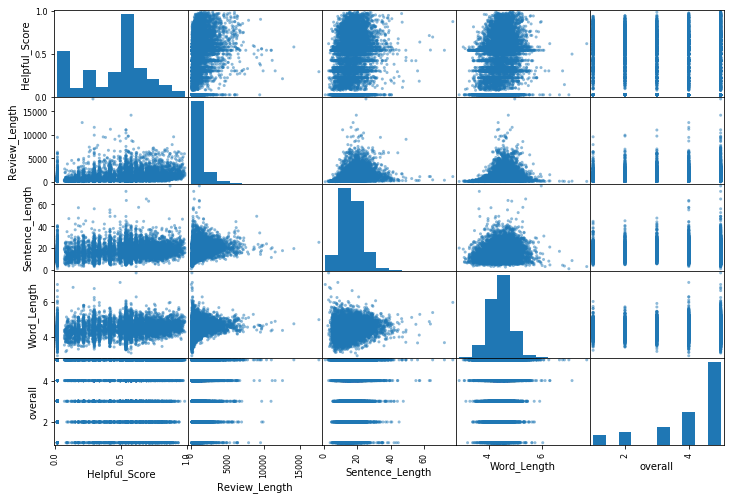

In [589]:
from pandas.plotting import scatter_matrix

attributes = ['Helpful_Score', 'Review_Length', 'Sentence_Length', 'Word_Length', 'overall']
scatter_matrix(df_sub[attributes], figsize=(12,8))

### Zoom In

I will zoom in on just one of plots above, Review_Length and Helpful_Score.

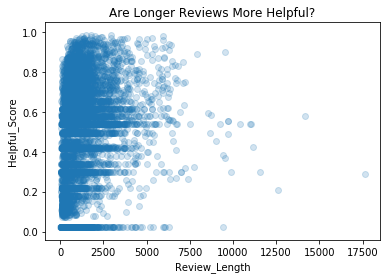

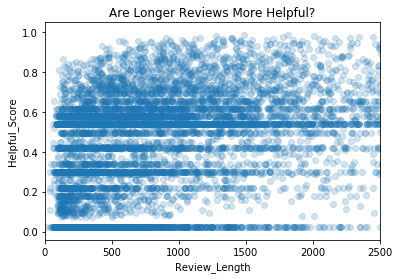

     Correlation: 0.2807595504245974 .


In [587]:
# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Review_Length', 'Helpful_Score', 'Are Longer Reviews More Helpful?', df_sub, 0.2)

# Show plot
plt.show()

# Create scatter plot comparing Total_Votes to Helpful_Votes
scatter('Review_Length', 'Helpful_Score', 'Are Longer Reviews More Helpful?', df_sub, 0.2)

# Limit x
plt.xlim(0,2500)

# Show plot
plt.show()


# CORRELATION

# Choose correlation arrays
x = df_sub['Review_Length']
y = df_sub['Helpful_Score']

# Compute correlation of x,y
coeff = correlation(x,y)

# Print result
print('     Correlation Coefficient:', coeff, '.')

Low helpful scores become less likely as the reviews become longer.

## Conclusion

My analysis reveals significant underlying patterns within the data. Further research is needed on the review texts to create more categories to supplement Review Length, Average Sentence Length, and Average Word Length. Creating numerous categories, however, may not prove as effective in the long run as an unsupervised approach to machine learning.